# Gauss-Otsu-labeling
We have so far processed images using filters such as Gaussian blurring, threshold algorithms such as Otsu's method and we labeled objects using connected component labeling. The combination of these three algorithms in particular is so common, that there are convenience functions available to exectue those three operations in one shot. This workflow for image segmentation is a very simple approach, e.g. for detecting and segmenting nuclei in fluorescence micropscopy images. It will work if the objects are not too dense.

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle

To demonstrate the workflow, we're using image data from the [Broad Bio Image Challenge](https://bbbc.broadinstitute.org/BBBC022):
We used image set BBBC022v1 [Gustafsdottir et al., PLOS ONE, 2013](http://dx.doi.org/10.1371/journal.pone.0080999), available from the Broad Bioimage Benchmark Collection [Ljosa et al., Nature Methods, 2012](http://dx.doi.org/10.1038/nmeth.2083).

We load the image and for visualisation purposes we crop out a sub-region:

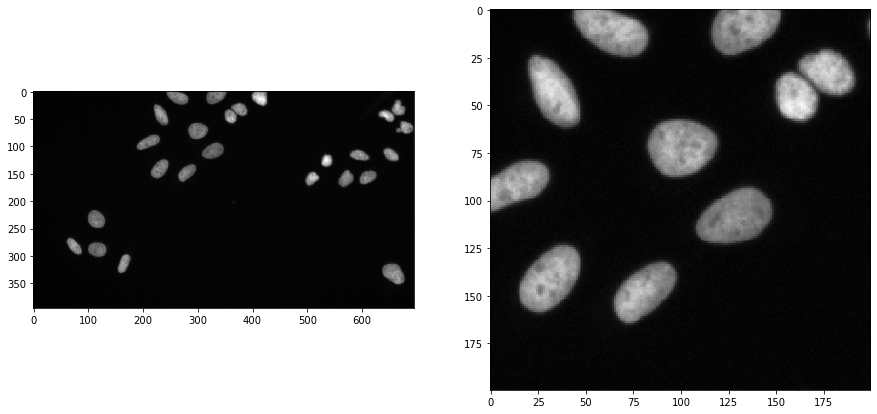

In [2]:
input_image = imread("../../data/BBBC022/IXMtest_A02_s9.tif")[:,:,0]

input_crop = input_image[0:200, 200:400]

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(input_image, plot=axs[0])
cle.imshow(input_crop, plot=axs[1])

## Applying the algorithm
Gauss-Otsu-labeling is a command in [pyclesperanto](https://github.com/clesperanto/pyclesperanto_prototype/) and the scriptable napari plugin [napari-segment-blobs-and-things-with-membranes](https://github.com/haesleinhuepf/napari-segment-blobs-and-things-with-membranes). The operation has a `outline_sigma` parameter for controlling how precise segmented objects are outlined.

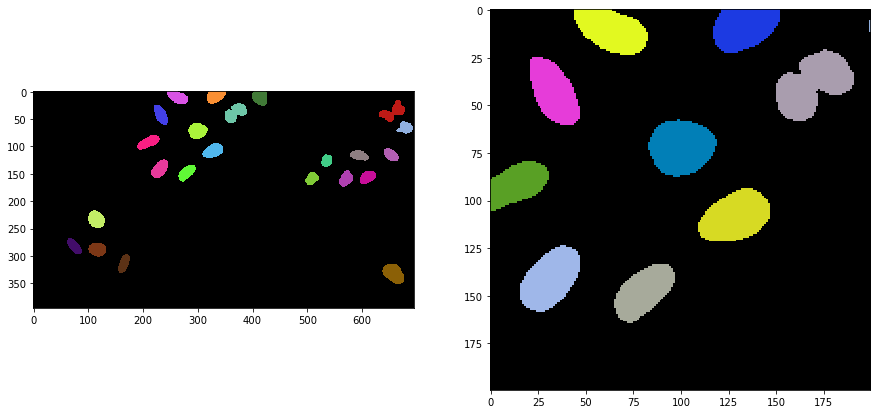

In [3]:
sigma_outline = 1

segmented = cle.gauss_otsu_labeling(input_image, outline_sigma=sigma_outline)
segmented_crop = segmented[0:200, 200:400]

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(segmented, labels=True, plot=axs[0])
cle.imshow(segmented_crop, labels=True, plot=axs[1])

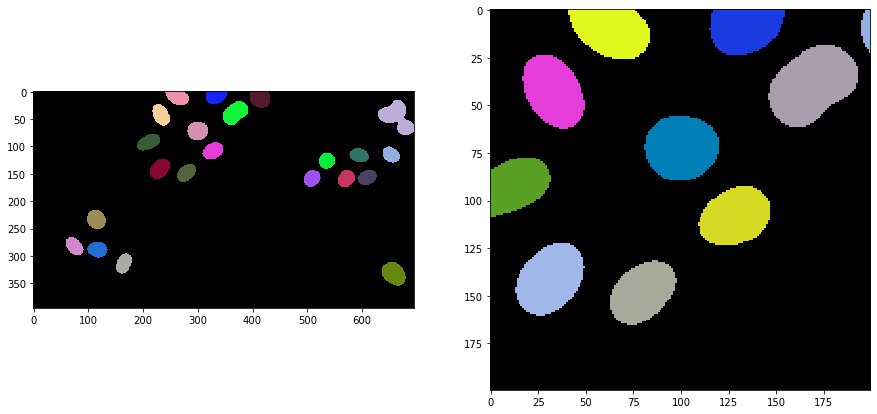

In [4]:
sigma_outline = 7

segmented = cle.gauss_otsu_labeling(input_image, outline_sigma=sigma_outline)
segmented_crop = segmented[0:200, 200:400]

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
cle.imshow(segmented, labels=True, plot=axs[0])
cle.imshow(segmented_crop, labels=True, plot=axs[1])

As you can see, if objects are too close, they will be segmented together. In these cases it is recommended to try [Voronoi-Otsu-Labeling](https://github.com/clEsperanto/pyclesperanto_prototype/blob/master/demo/segmentation/voronoi_otsu_labeling.ipynb).